In [1]:
import matplotlib.pyplot as plt  
import numpy as np 
from sklearn import datasets
import time
from sklearn import metrics
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
file_path = r'./使用数据'
data = pd.read_csv(os.path.join(file_path,'样地统计信息.csv'),encoding='utf_8_sig',engine='python')
data

,plot_id,nmws,ntree,dbh2_ratio,num_ratio,biomass,nsp,sprichness,shannon,simpon,pielou
0,1.csv,13,14,0.993235,0.928571,11.067633,2,0.142857,0.371232,0.132653,0.371232
1,2.csv,23,29,0.932001,0.793103,11.722384,2,0.068966,0.735509,0.328181,0.735509
2,3.csv,16,26,0.919846,0.615385,13.197564,7,0.269231,1.854286,0.585799,0.660510
3,4.csv,27,32,0.987783,0.843750,18.711371,2,0.062500,0.625262,0.263672,0.625262
4,5.csv,22,22,1.000000,1.000000,9.254236,1,0.045455,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83,85.csv,31,56,0.851322,0.553571,1.482282,2,0.035714,0.991703,0.494260,0.991703
84,86.csv,0,23,0.000000,0.000000,0.214053,1,0.043478,0.000000,0.000000,NaN
85,87.csv,12,12,1.000000,1.000000,12.210925,1,0.083333,0.000000,0.000000,NaN
86,88.csv,15,15,1.000000,1.000000,11.355286,1,0.066667,0.000000,0.000000,NaN


In [30]:
#选择用于聚类的参数
df = pd.DataFrame(data,columns=['nsp','sprichness','biomass'])
df.biomass.max()

48.53104085

In [4]:
ss_x = StandardScaler().fit(df)

In [5]:
stand_df = ss_x.transform(df)
stand_df

array([[-4.98152721e-01,  6.94843948e-01, -2.08977026e-02],
       [-4.98152721e-01, -4.49854107e-01,  7.06517043e-02],
       [ 2.20786206e+00,  2.65257112e+00,  2.76915958e-01],
       [-4.98152721e-01, -5.50015183e-01,  1.04787358e+00],
       [-1.03935568e+00, -8.14076217e-01, -2.74452492e-01],
       [-4.98152721e-01, -2.78912528e-01, -4.94675067e-02],
       [-4.98152721e-01, -3.26578928e-01, -4.19726769e-01],
       [-4.98152721e-01, -6.33005794e-01, -2.87418541e-01],
       [ 4.30502351e-02, -1.90389208e-01,  1.10919556e-01],
       [-1.03935568e+00, -9.64968221e-01,  1.99612782e-01],
       [-1.03935568e+00, -9.64968221e-01,  2.17815877e-01],
       [ 1.66665910e+00,  2.05674112e+00, -2.98831323e-01],
       [-4.98152721e-01, -4.11697509e-01,  1.22333947e+00],
       [-4.98152721e-01,  8.65081094e-01,  7.41017532e-01],
       [-1.03935568e+00, -5.50015183e-01,  1.23523664e+00],
       [ 1.12545615e+00,  2.35465612e+00,  2.91581361e+00],
       [-4.98152721e-01, -1.09913469e-01

In [15]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=3)  # 构造聚类器
estimator.fit(stand_df)  # 聚类


KMeans(n_clusters=3)

In [16]:
import matplotlib

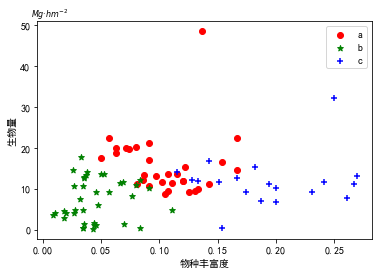

In [17]:
label_pred = estimator.labels_  # 获取聚类标签
# x0 = df[label_pred == 0]
# # x1 = df[label_pred == 1]
x0 = ss_x.inverse_transform(stand_df[label_pred == 0])
x1 = ss_x.inverse_transform(stand_df[label_pred == 1])
x2 = ss_x.inverse_transform(stand_df[label_pred == 2])
# x2 = df[label_pred == 2]
plt.scatter(x0[:,1], x0[:,2], c="red", marker='o', label='a')  
plt.scatter(x1[:,1], x1[:,2], c="green", marker='*', label='b')  
plt.scatter(x2[:,1], x2[:,2], c="blue", marker='+', label='c')  
plt.xlabel('物种丰富度')  
plt.ylabel('生物量') 
plt.legend(loc=1)  
plt.text(x = -0.01 ,y = 52 , s = r'$Mg·hm^{-2}$',size=8)
# matplotlib.mathtext()
plt.savefig(r'G:\python林业资源\出图/聚类k-mean.png',dpi=300)
plt.show()

In [18]:
center_ids = estimator.cluster_centers_
r1 = pd.Series(label_pred).value_counts()
r2 = pd.DataFrame(center_ids)
r = pd.concat([r2, r1], axis = 1)
r.columns = [u'nsp',u'sprichness',u'biomass'] + [u'类别数目']
print(r)

        nsp  sprichness   biomass  类别数目
0  0.025592    0.104193  0.625901    31
1 -0.782996   -0.812612 -0.551754    38
2  1.524237    1.455225  0.082302    19


In [19]:
from sklearn.cluster import MeanShift 
ms = MeanShift(bandwidth=1.4,seeds=None,bin_seeding=False,min_bin_freq=1,cluster_all=True,n_jobs=1)
ms.fit(stand_df)  # 聚类

MeanShift(bandwidth=1.4, n_jobs=1)

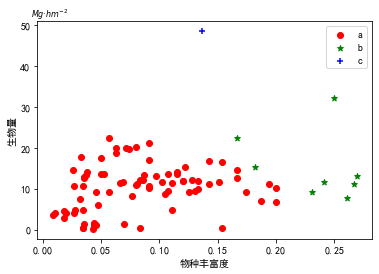

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
label_pred = ms.labels_  # 获取聚类标签
x0 = ss_x.inverse_transform(stand_df[label_pred == 0])
x1 = ss_x.inverse_transform(stand_df[label_pred == 1])
x2 = ss_x.inverse_transform(stand_df[label_pred == 2])
plt.scatter(x0[:,1], x0[:,2], c="red", marker='o', label='a')  
plt.scatter(x1[:,1], x1[:,2], c="green", marker='*', label='b')  
plt.scatter(x2[:,1], x2[:,2], c="blue", marker='+', label='c')  
plt.xlabel('物种丰富度')  
plt.ylabel('生物量') 
plt.legend(loc=1)  
plt.text(x = -0.01 ,y = 52 , s = r'$Mg·hm^{-2}$',size=8)
plt.savefig(r'G:\python林业资源\出图/聚类meanshift.png',dpi=300)
plt.show()
label_pred

In [22]:
center_ids = ms.cluster_centers_
r1 = pd.Series(label_pred).value_counts()
r2 = pd.DataFrame(center_ids)
r = pd.concat([r2, r1], axis = 1)
r.columns = [u'nsp',u'sprichness',u'biomass'] + [u'类别数目']
print(r)

        nsp  sprichness   biomass  类别数目
0 -0.508560   -0.524914 -0.264455    79
1  1.125456    2.354656  2.915814     8
2  0.043050    0.594249  5.217352     1


In [24]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6,  # 邻域半径
min_samples=2,    # 最小样本点数，MinPts
metric='euclidean',
metric_params=None,
algorithm='auto', # 'auto','ball_tree','kd_tree','brute',4个可选的参数 寻找最近邻点的算法，例如直接密度可达的点
leaf_size=20, # balltree,cdtree的参数
p=None, # 
n_jobs=1)
dbscan.fit(stand_df) 

DBSCAN(eps=0.6, leaf_size=20, min_samples=2, n_jobs=1)

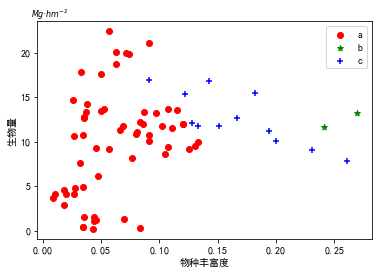

array([-1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0, -1,  0,
       -1,  0,  0,  2, -1,  0,  2,  2,  0, -1,  0, -1,  2,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  2, -1, -1, -1,  2, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  2,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int64)

In [27]:
label_pred = dbscan.labels_  # 获取聚类标签
x0 = ss_x.inverse_transform(stand_df[label_pred == 0])
x1 = ss_x.inverse_transform(stand_df[label_pred == 1])
x2 = ss_x.inverse_transform(stand_df[label_pred == 2])
plt.scatter(x0[:,1], x0[:,2], c="red", marker='o', label='a')  
plt.scatter(x1[:,1], x1[:,2], c="green", marker='*', label='b')  
plt.scatter(x2[:,1], x2[:,2], c="blue", marker='+', label='c')  
plt.xlabel('物种丰富度')  
plt.ylabel('生物量') 
plt.legend(loc=1)  
plt.text(x = -0.01 ,y = 24 , s = r'$Mg·hm^{-2}$',size=8)
plt.savefig(r'G:\python林业资源\出图/聚类DBSCAN.png',dpi=300)
plt.show()
label_pred